<a href="https://colab.research.google.com/github/PraneelUJ/CS203_Lab_6/blob/main/CS203_Lab_6_task1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Task1: Implement a Multi-Layer Perceptron (MLP) Using the Iris Dataset
- Load the Iris dataset using sklearn.datasets.load_iris.
- Extract features and labels, ensuring labels are one-hot encoded.
- Split the dataset into training (80%) and testing (20%) sets.
- Normalize feature values to [0,1] using standard scaling.


In [18]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
import numpy as np
import matplotlib.pyplot as plt

In [2]:
iris = load_iris(as_frame=True)

In [3]:
iris

{'data':      sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
 0                  5.1               3.5                1.4               0.2
 1                  4.9               3.0                1.4               0.2
 2                  4.7               3.2                1.3               0.2
 3                  4.6               3.1                1.5               0.2
 4                  5.0               3.6                1.4               0.2
 ..                 ...               ...                ...               ...
 145                6.7               3.0                5.2               2.3
 146                6.3               2.5                5.0               1.9
 147                6.5               3.0                5.2               2.0
 148                6.2               3.4                5.4               2.3
 149                5.9               3.0                5.1               1.8
 
 [150 rows x 4 columns],
 'target': 0     

In [4]:
X=iris.data
y=iris.target

In [5]:
y=y.to_numpy().reshape(-1, 1)

In [6]:
y.shape

(150, 1)

In [7]:
encoder=OneHotEncoder(sparse_output=False)
y_encoded=encoder.fit_transform(y)

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=45, stratify=y,shuffle=True)



In [25]:
scaler=StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Task 2: Define and Train the MLP Model
- Construct a Multi-Layer Perceptron (MLP) model with the following architecture:
- Input layer: 4 neurons (for 4 features).
- Hidden layer: 16 neurons, ReLU activation.
- Output layer: 3 neurons (for each class), softmax activation.
- Train using:
- Loss function: Categorical cross-entropy.
- Optimizer: Adam.
- Learning rate: 0.001.
- Batch size: 32.
- Epochs: 50.

In [26]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

In [27]:
model=Sequential([Dense(16,activation="relu",input_shape=(4,)),
                  Dense(3,activation='softmax')])

model.compile(optimizer=Adam(learning_rate=0.001),loss='categorical_crossentropy',metrics=['accuracy'])

model_history=model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.125)



Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 98ms/step - accuracy: 0.5071 - loss: 0.9125 - val_accuracy: 0.6000 - val_loss: 1.0632
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 94ms/step - accuracy: 0.5581 - loss: 0.8526 - val_accuracy: 0.6000 - val_loss: 1.0387
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - accuracy: 0.5404 - loss: 0.8909 - val_accuracy: 0.6000 - val_loss: 1.0141
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.6035 - loss: 0.8786 - val_accuracy: 0.6000 - val_loss: 0.9903
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - accuracy: 0.6264 - loss: 0.8429 - val_accuracy: 0.6000 - val_loss: 0.9674
Epoch 6/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.6799 - loss: 0.7974 - val_accuracy: 0.6000 - val_loss: 0.9458
Epoch 7/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.6840 - loss: 0.8243 - val_accuracy: 0.6000 - val_loss: 0.9241
Epoch 8/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 0.6528 - loss: 0.8001 - val_accuracy: 0.6000 - val_loss: 0.9034
Epoch 9/50


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.8000 - loss: 0.4576
The test accuracy is 0.8000
Training Losses:
 [0.92719913 0.90674037 0.88722497 0.86893237 0.85089403 0.8337642
 0.81731224 0.80096489 0.78616625 0.77122223 0.75655109 0.74304408
 0.72962821 0.71606356 0.70295346 0.69053453 0.67801064 0.66647804
 0.65516716 0.643484   0.63269138 0.62251872 0.61190486 0.60149723
 0.59177917 0.58221638 0.57308716 0.56398541 0.55550992 0.54763418
 0.53964031 0.53223079 0.52477574 0.51758355 0.51058871 0.50365496
 0.49688312 0.48994958 0.48364219 0.47679982 0.47047013 0.46356753
 0.45765585 0.45180961 0.44563311 0.43945274 0.43376189 0.42790127
 0.42258036 0.41667932]
Validation Losses:
 [1.06319034 1.03868628 1.01407492 0.99030524 0.96737421 0.9457972
 0.92411727 0.90338951 0.88336408 0.86520922 0.84772974 0.83042055
 0.81442624 0.79840845 0.78346813 0.76917773 0.7554605  0.74186969
 0.7288205  0.71618026 0.70366168 0.69095206 0.67744911 0.66475904
 0.65233624 0.64042372 0.62937725 0.

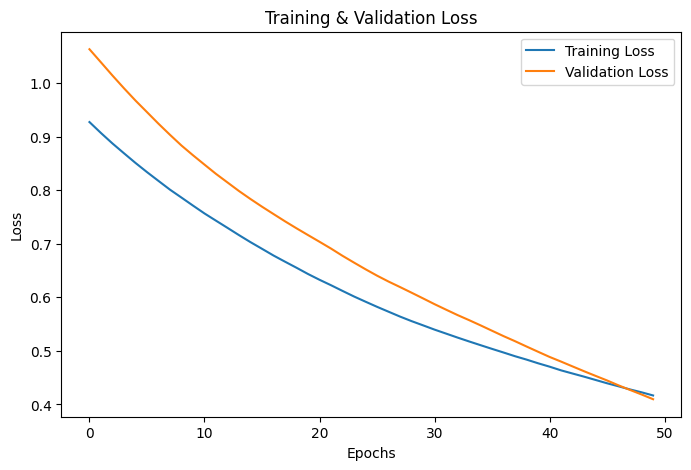

In [28]:
test_loss,test_accuracy=model.evaluate(X_test,y_test)
print(f"The test accuracy is {test_accuracy:.4f}" )

array_training_losses=np.array(model_history.history['loss'])
array_validation_losses=np.array(model_history.history['val_loss'])

print("Training Losses:\n", array_training_losses)
print("Validation Losses:\n", array_validation_losses)

# Plot training & validation loss
plt.figure(figsize=(8, 5))
plt.plot(array_training_losses, label='Training Loss')
plt.plot(array_validation_losses, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training & Validation Loss')
plt.legend()
plt.show()

In [20]:
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
Accuracy: 0.8000
Precision: 0.8586
Recall: 0.8000
F1-score: 0.7746


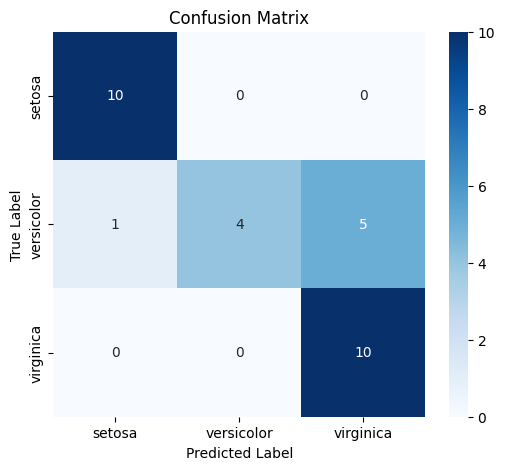

In [30]:
y_prob=model.predict(X_test)

y_pred_label=model.predict(X_test)

y_pred=np.argmax(y_pred_label,axis=1)

y_true=np.argmax(y_test,axis=1)

accuracy=accuracy_score(y_true,y_pred)
precision=precision_score(y_true,y_pred,average="weighted")
recall=recall_score(y_true,y_pred,average="weighted")
f1=f1_score(y_true,y_pred,average="weighted")
confusion=confusion_matrix(y_true,y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")

plt.figure(figsize=(6, 5))
sns.heatmap(confusion, annot=True, cmap="Blues", fmt="d",
            xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()